# Datasets

## Birds

Data was collected through [GBIF | Global Biodiversity Information Facility](https://www.gbif.org). I found a dataset published by [DOF/BirdLife Denmark - Observations from DOFbasen](https://dofbasen.dk) and filtered it by 1998 - 2025, containing only the threatened and rare breeding birds.

### Taxanomy

[Youtube 10mins video](https://www.youtube.com/watch?v=Gdgtr5RlBDc)
[Birding Basics Taxonomy](https://www.youtube.com/watch?v=1bM9ulaKDRA)

Taxanomy is the process of classification or categorisation of living organisms. With taxonomy we are placing species closer together based on their similarity.

The class 'Aves' is just the latin word for birds. Birds are feathered dinosaurs. The order of the bird is it's type, such as 

![aves](./resources/from-life-to-aves.png)

## References

- [GBIF citation guidelines](https://www.gbif.org/citation-guidelines)
- [Truede og sjældne ynglefulge](https://www.dof.dk/fakta-om-fugle/truede-og-sjaeldne-ynglefugle)
    - Ynglefugl er en standfugl der er i Danmark hele året
- [Den Danske Rødliste](https://ecos.au.dk/forskningraadgivning/temasider/redlist)
    - Den Danske Rødliste er en samlet oversigt over ca. 13.900 danske arter, og den rummer bl.a. information om, hvor truede alle disse arter er. 

# Project Assignment A

- An explanation of the central idea behind your final project, e.g. think about questions such as
    - What is the idea?
    - Which datasets do you need to explore the idea?,
    - Why is it interesting?
- A mock up of the visualization that you wish to build. (Anything is fine here. Pen and paper, MS Paint, Inkscape, D3, Midjourney (or any other LLM), anything is OK).
- Make sure you answer the questions
    - What genre is it? (for Genres, see section 4.3 of the Segel and Heer paper)
    - Why is that genre right for telling the story you want to communicate with the data
- A walk-through of your preliminary data-analysis, addressing
    - What is the total size of your data? (MB, number of rows, number of variables, etc)
    - What are other properties? (What is the date range? Is is it geo-data?, then a quick plot of locations, etc.)
    - Show the fundamental distributions of the data (similar to the work we did on SF crime data)
But other than that, there are no constraints. And we do appreciate funny/inventive/beautiful movies, although the academic content is most important. Note that we'll display the movie to the entire class.

(The maximum length is 1 minutes, but its OK if the movie is shorter.)


# Pitch

The data I have decided to work with for the final project, is a dataset on threathened and rare bird species in Denmark from 1998 - 2025.
I did some research within some different topics, and one of my personal passions are birds. I stumbled upon a site called [Global Biodiversity Information Facility (GBIF)](https://www.gbif.org), which provides free and open access to biodiversity data. On the site, I found a dataset which was published by [Dansk Ornitologisk Forenings (DOF)](https://dofbasen.dk), which contained a large dataset on observations of birds.

One thing I found interesting was especially the rare and threathened species of breeding birds in Denmark. Since 1998, DOF has been keeping track of [threathened and rare breeding birds in Denmark](https://www.dof.dk/fakta-om-fugle/truede-og-sjaeldne-ynglefugle) (*Projekt truede og sjældne ynglefugle 1998-2027*), and I found this as a great opportunity to explore the data even further.

I filtered the dataset from DOF by 1998 - 2025, containing only the threatened and rare breeding birds, which were available in an article on the website. From 1998 to 2013 the project was founded by Aage V. Jensens Naturfond, and after 2013 the project became a part of an agreement between Miljøministeriet and DOF. The list of threathened and rare species contains 37 different species in total. However, only the nation is interested in 11 of these, but DOF disagrees that the other 26 species are considered "not-threathened", and so the full list is 37 species in total. So to sum up; ther are 11 'mandatory' species that the project must keep track on, as this was the national agreement made - however DOF disagrees and has added additionally 26 species that they also believe are threathened. These are distinguished with an asterix on the website.

This would be an interesting exam project, due to the fact that biodiversity is a current topic in the Danish society. The past couple of years there has been more focus on the importance of maintaining biodiversity, and we see it on different aspects in Denmark; the initiatives made of "wild nature" and the fact that Denmark is losing rare and threathened species (plants, butterflies, insects, hedgehogs etc.), I believe it would be a good contribution to the topic, and I haven't seen much focus on birds.

My goal is to shed some light to the rare and threathened bird breeding species in Denmark, showing how they have thrived the past years where this project has been running. I thought about doing a partitioned poster and/or slideshow kind of visualisation to show what I'll discover. I belive slideshow visualisation would be a good fit, as it would enable me to build up the story, and as I'll be working with a time based dataset of the situation of the birds, I think it would be cool to be able to tell a stoyr in 'sections'. Only thing I'm afraid of is that it might be too complex for me to be able to do within the time, but I'll see. However I found out that slideshows are quite outdated so I'll investigate maybe doing a [scrollytelling](https://data.europa.eu/apps/data-visualisation-guide/scrollytelling-introduction) story, which has replaced slideshows.

# Data-analysis

My dataset is quite large (1.35 GB) and contained alot of unnecesary data. There were 50 columns in my dataset, and I ended up keeping only 10 of them. The columns I ended up keeping, were

```python
    family             # the bird family, such as "Anatidae" (ducks)
    genus              # the bird genus, such as "Cygnus" (swans)
    species            # the actual specie
    locality           # location where it was tracked
    coordinateUncertaintyInMeters    # some unknown uncertainty in meters, not sure if applicable
    decimalLatitude    # lat
    decimalLongitude   # lon
    eventDate          # full date (yyyy-mm-dd)
    month              # month
    year               # year
```

After filtering the dataset to these 10 columns, it's size was about 200 mb. The dataset contains 2.598.654 entries and ranges from 1998 - 2025.

In [38]:
# packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import calplot as cp
import folium
from folium.plugins import HeatMapWithTime
from urllib.request import urlopen
import json
import plotly.express as px

In [39]:
pd.options.display.max_columns = None
# Specify the correct delimiter and handle bad lines (tab separated file)
df = pd.read_csv('./resources/DOF-observations-threathened-and-rare-species-1998-2025.csv', sep='\t', on_bad_lines='skip')
# Preview the first few rows to verify the structure
df.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,1689555233,95db4db8-f762-11e1-a439-00145eb45e9a,307,Animalia,Chordata,Aves,Pelecaniformes,Threskiornithidae,Platalea,Platalea leucorodia,NaN,SPECIES,"Platalea leucorodia Linnaeus, 1758",Platalea leucorodia,NaN,DK,Bygholm Vejle,NaN,PRESENT,3,8b734449-479a-4924-8f7a-9a2a64112f8f,57.04859,9.08802,2510.0,NaN,NaN,NaN,NaN,NaN,2002-05-12,12,5,2002,2480801,2480801,HUMAN_OBSERVATION,NaN,NaN,NaN,NaN,Jan Durinck (7730JDU),NaN,CC_BY_NC_4_0,NaN,Jan Durinck (7730JDU),NaN,NaN,2025-04-04T01:15:55.844Z,NaN,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
1,1993530598,95db4db8-f762-11e1-a439-00145eb45e9a,678682,Animalia,Chordata,Aves,Accipitriformes,Pandionidae,Pandion,Pandion haliaetus,NaN,SPECIES,"Pandion haliaetus (Linnaeus, 1758)",Pandion haliaetus,NaN,DK,Skærsø Plantage,NaN,PRESENT,1,8b734449-479a-4924-8f7a-9a2a64112f8f,56.23806,10.68577,2240.0,NaN,NaN,NaN,NaN,NaN,2001-06-13,13,6,2001,2480726,2480726,HUMAN_OBSERVATION,NaN,NaN,NaN,NaN,Kim Frost (8270KF),NaN,CC_BY_NC_4_0,NaN,Kim Frost (8270KF),NaN,NaN,2025-04-04T01:15:59.192Z,NaN,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
2,1678027027,95db4db8-f762-11e1-a439-00145eb45e9a,10517,Animalia,Chordata,Aves,Anseriformes,Anatidae,Cygnus,Cygnus cygnus,NaN,SPECIES,"Cygnus cygnus (Linnaeus, 1758)",Cygnus cygnus,NaN,DK,Harboslette,NaN,PRESENT,15,8b734449-479a-4924-8f7a-9a2a64112f8f,57.09517,8.78545,1660.0,NaN,NaN,NaN,NaN,NaN,2001-11-16,16,11,2001,2498347,2498347,HUMAN_OBSERVATION,NaN,NaN,NaN,NaN,Albert Schmidt (7741AS),NaN,CC_BY_NC_4_0,NaN,Albert Schmidt (7741AS),NaN,NaN,2025-04-04T01:15:55.914Z,NaN,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
3,1678612264,95db4db8-f762-11e1-a439-00145eb45e9a,11051,Animalia,Chordata,Aves,Anseriformes,Anatidae,Mergus,Mergus merganser,NaN,SPECIES,"Mergus merganser Linnaeus, 1758",Mergus merganser,NaN,DK,Haderslev Dam,NaN,PRESENT,10,8b734449-479a-4924-8f7a-9a2a64112f8f,55.23635,9.44826,2370.0,NaN,NaN,NaN,NaN,NaN,2001-03-18,18,3,2001,9537647,9537647,HUMAN_OBSERVATION,NaN,NaN,NaN,NaN,Egon Jensen (6100EJ),NaN,CC_BY_NC_4_0,NaN,Egon Jensen (6100EJ),NaN,NaN,2025-04-04T01:15:58.006Z,NaN,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...
4,1682234434,95db4db8-f762-11e1-a439-00145eb45e9a,14351,Animalia,Chordata,Aves,Anseriformes,Anatidae,Cygnus,Cygnus cygnus,NaN,SPECIES,"Cygnus cygnus (Linnaeus, 1758)",Cygnus cygnus,NaN,DK,Værnengene,NaN,PRESENT,20,8b734449-479a-4924-8f7a-9a2a64112f8f,55.85446,8.23863,4060.0,NaN,NaN,NaN,NaN,NaN,2002-03-14,14,3,2002,2498347,2498347,HUMAN_OBSERVATION,NaN,NaN,NaN,NaN,Jan Dresler (2730JDR),NaN,CC_BY_NC_4_0,NaN,Jan Dresler (2730JDR),NaN,NaN,2025-04-04T01:15:55.947Z,NaN,OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COU...


In [40]:
len(df.columns)

50

In [41]:
cols_to_keep = [
    'family',
    'genus',
    'species',
    'locality',
    'coordinateUncertaintyInMeters',
    'decimalLatitude',
    'decimalLongitude',
    'eventDate',
    'month',
    'year'
]

In [42]:
df_filtered = df[cols_to_keep]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598654 entries, 0 to 2598653
Data columns (total 10 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   family                         object 
 1   genus                          object 
 2   species                        object 
 3   locality                       object 
 4   coordinateUncertaintyInMeters  float64
 5   decimalLatitude                float64
 6   decimalLongitude               float64
 7   eventDate                      object 
 8   month                          int64  
 9   year                           int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 198.3+ MB


In [43]:
df_filtered = df_filtered[df_filtered['year'] != 2025] # remove 2025
df_filtered.head()

,family,genus,species,locality,coordinateUncertaintyInMeters,decimalLatitude,decimalLongitude,eventDate,month,year
0,Threskiornithidae,Platalea,Platalea leucorodia,Bygholm Vejle,2510.0,57.04859,9.08802,2002-05-12,5,2002
1,Pandionidae,Pandion,Pandion haliaetus,Skærsø Plantage,2240.0,56.23806,10.68577,2001-06-13,6,2001
2,Anatidae,Cygnus,Cygnus cygnus,Harboslette,1660.0,57.09517,8.78545,2001-11-16,11,2001
3,Anatidae,Mergus,Mergus merganser,Haderslev Dam,2370.0,55.23635,9.44826,2001-03-18,3,2001
4,Anatidae,Cygnus,Cygnus cygnus,Værnengene,4060.0,55.85446,8.23863,2002-03-14,3,2002


In [44]:

df_yrs = df_filtered.value_counts('year')
print(f"year with most registered threathened species: {df_yrs.idxmax()}. Count: {df_yrs.max()}")
print(f"year with lest registered threathened species: {df_yrs.idxmin()}. Count: {df_yrs.min()}")

year with most registered threathened species: 2024. Count: 198761
year with lest registered threathened species: 1998. Count: 17024


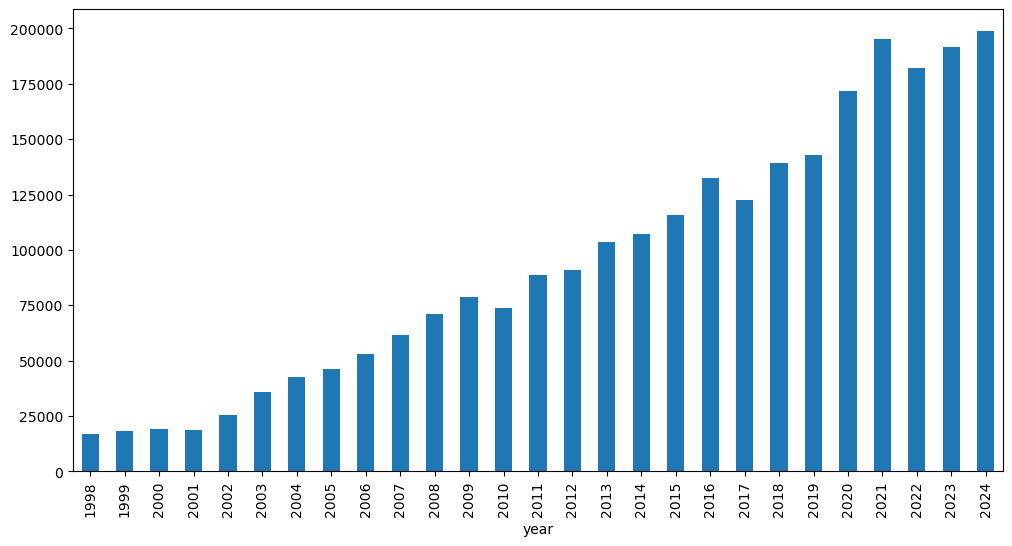

In [45]:
df_yrs = df_yrs.sort_index()

plt.figure(figsize=(12, 6))
df_yrs.plot(kind='bar')
plt.show()

In [46]:
species_yearly = df_filtered.groupby(['year', 'species']).size().unstack()
species_yearly = species_yearly.fillna(0.0)
species_yearly.head(20)



species,Aegolius funereus,Anthus campestris,Aquila chrysaetos,Ardea alba,Asio flammeus,Branta leucopsis,Calidris alpina,Calidris pugnax,Chlidonias niger,Ciconia ciconia,Ciconia nigra,Cinclus cinclus,Circus cyaneus,Circus pygargus,Cygnus cygnus,Dendrocoptes medius,Falco peregrinus,Falco subbuteo,Gelochelidon nilotica,Glaucidium passerinum,Haliaeetus albicilla,Himantopus himantopus,Hydroprogne caspia,Ichthyaetus melanocephalus,Lanius excubitor,Limosa limosa,Mergus merganser,Merops apiaster,Milvus milvus,Pandion haliaetus,Phylloscopus trochiloides,Platalea leucorodia,Pluvialis apricaria,Podiceps auritus,Porzana porzana,Remiz pendulinus,Sylvia nisoria
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1998,0.0,2.0,62.0,32.0,101.0,881.0,2630.0,1006.0,144.0,125.0,2.0,386.0,1150.0,133.0,2110.0,0.0,512.0,358.0,0.0,0.0,887.0,26.0,31.0,60.0,259.0,220.0,1507.0,14.0,625.0,1611.0,5.0,64.0,1933.0,43.0,1.0,95.0,9.0
1999,0.0,0.0,71.0,38.0,180.0,1007.0,2685.0,1203.0,199.0,113.0,8.0,518.0,1385.0,191.0,2059.0,0.0,628.0,536.0,1.0,73.0,553.0,4.0,41.0,84.0,387.0,239.0,1631.0,20.0,709.0,1588.0,0.0,84.0,1845.0,58.0,42.0,68.0,0.0
2000,0.0,1.0,99.0,30.0,187.0,1165.0,2685.0,1302.0,145.0,218.0,5.0,329.0,1695.0,321.0,2051.0,0.0,816.0,632.0,3.0,84.0,426.0,0.0,43.0,83.0,387.0,311.0,1508.0,28.0,682.0,1504.0,1.0,79.0,1998.0,62.0,33.0,41.0,0.0
2001,0.0,0.0,77.0,59.0,151.0,1289.0,2277.0,1144.0,121.0,116.0,5.0,356.0,1594.0,265.0,2490.0,0.0,835.0,443.0,3.0,0.0,721.0,3.0,49.0,79.0,402.0,332.0,1696.0,10.0,647.0,1228.0,0.0,116.0,1905.0,49.0,8.0,76.0,2.0
2002,0.0,3.0,178.0,156.0,325.0,1509.0,3166.0,1401.0,413.0,126.0,4.0,522.0,2411.0,315.0,3143.0,0.0,1413.0,596.0,5.0,0.0,1003.0,0.0,75.0,134.0,739.0,442.0,1857.0,26.0,1030.0,1611.0,2.0,330.0,2220.0,68.0,49.0,66.0,14.0
2003,1.0,0.0,370.0,132.0,541.0,1444.0,3752.0,2152.0,338.0,309.0,11.0,784.0,3674.0,350.0,4481.0,0.0,1946.0,713.0,1.0,9.0,1908.0,32.0,58.0,209.0,1146.0,590.0,2949.0,31.0,1678.0,2492.0,1.0,422.0,3180.0,88.0,54.0,93.0,15.0
2004,0.0,0.0,370.0,209.0,495.0,2283.0,4723.0,2414.0,567.0,273.0,27.0,772.0,3993.0,454.0,5632.0,0.0,2105.0,929.0,13.0,7.0,2181.0,44.0,111.0,169.0,1294.0,686.0,3671.0,4.0,1909.0,2699.0,8.0,658.0,3746.0,117.0,10.0,96.0,15.0
2005,0.0,7.0,394.0,117.0,538.0,2799.0,5528.0,2509.0,531.0,179.0,0.0,742.0,4262.0,492.0,5760.0,0.0,2653.0,825.0,19.0,0.0,2639.0,73.0,92.0,176.0,1111.0,702.0,3834.0,11.0,2515.0,3094.0,0.0,606.0,3899.0,145.0,10.0,78.0,12.0
2006,0.0,4.0,279.0,433.0,546.0,3793.0,5302.0,2329.0,631.0,330.0,4.0,776.0,5216.0,632.0,7004.0,0.0,3348.0,1321.0,1.0,109.0,3368.0,24.0,148.0,264.0,1003.0,799.0,4826.0,2.0,2722.0,2592.0,0.0,655.0,4182.0,210.0,43.0,136.0,8.0


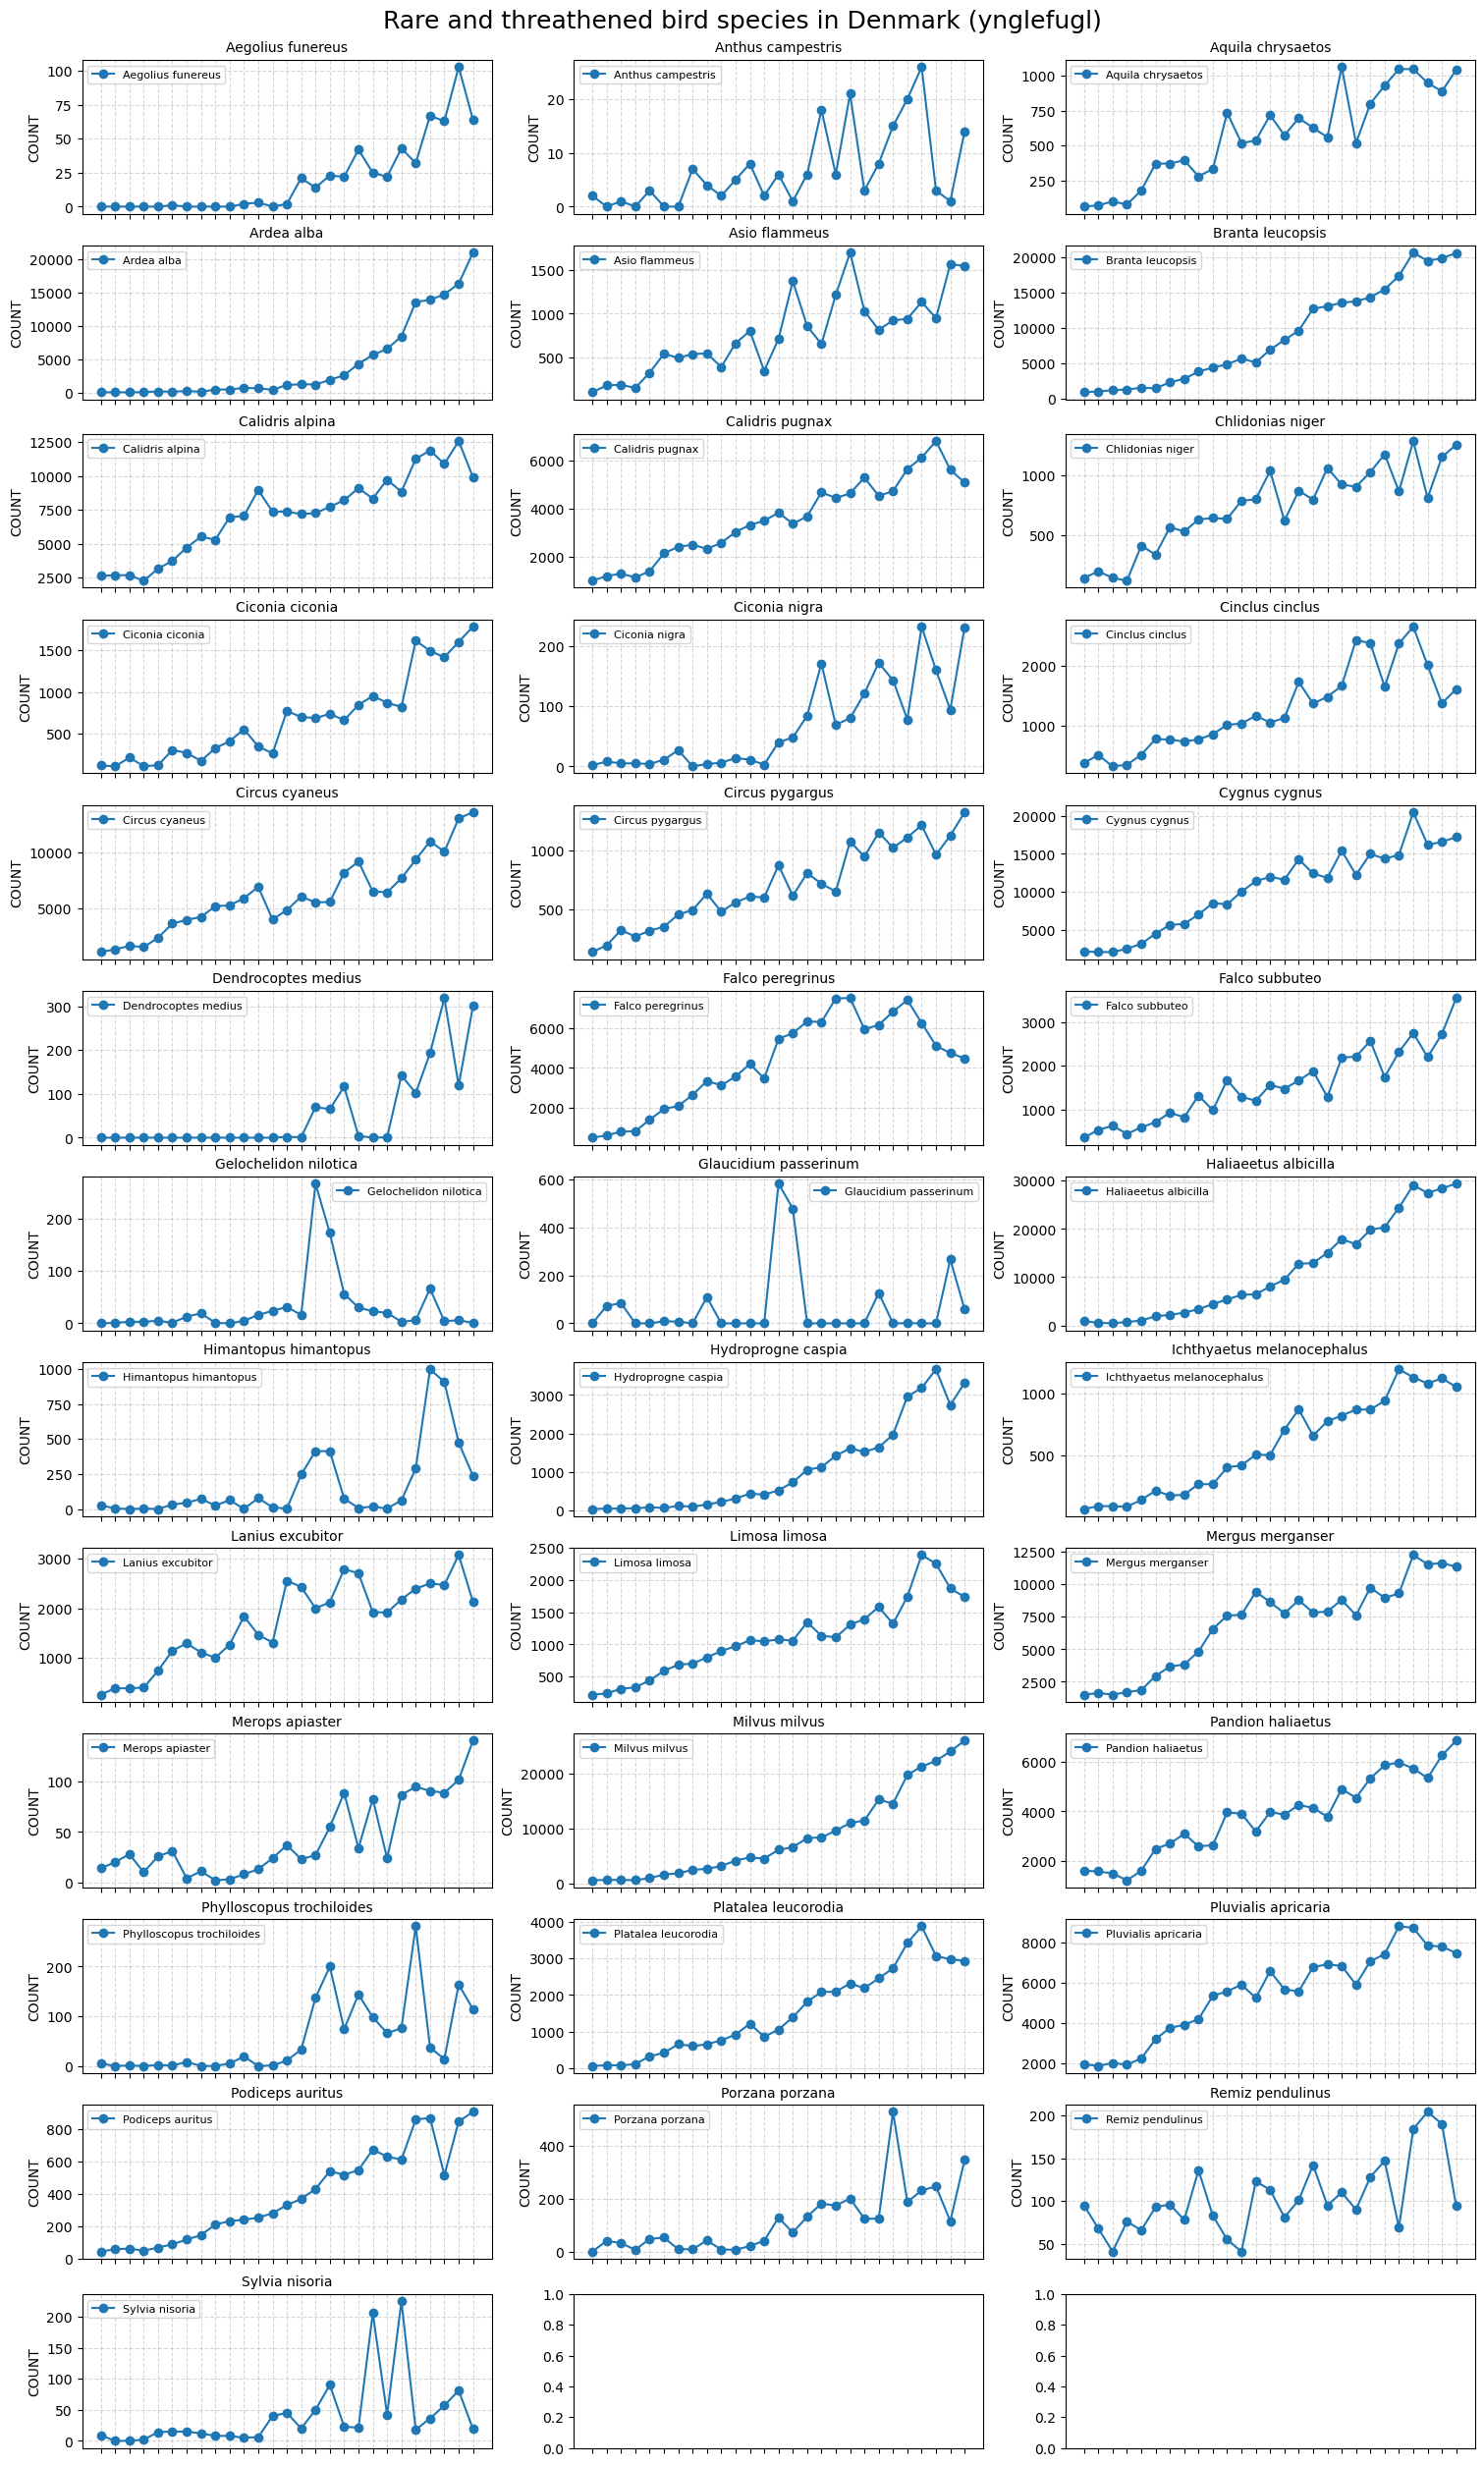

In [47]:
fig, axes = plt.subplots(nrows=13, ncols=3, figsize=(15,25), sharex=True, constrained_layout=True)
axes = axes.flatten()

for i, specie in enumerate(species_yearly.columns):
    axes[i].plot(species_yearly.index, species_yearly[specie], marker='o', label=specie)
    axes[i].set_title(specie, fontsize=10)
    axes[i].set_ylabel("COUNT")
    axes[i].set_xticks(ticks=np.arange(1998, 2025), labels=np.arange(2998, 2025), rotation=90)
    axes[i].grid(True, linestyle="--", alpha=0.5)
    axes[i].legend(fontsize=8)

plt.suptitle("Rare and threathened bird species in Denmark (ynglefugl)", fontsize=18)
plt.show()